In [1]:
import pandas as pd


C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("health_outcome_dataset.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
df.shape

(1235, 29)

In [3]:
df.isna().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

df.drop('lesion_3', inplace = True, axis = 1)

# Create imputer objects
num_imputer = SimpleImputer(strategy='median')  # Imputer for numerical data
cat_imputer = SimpleImputer(strategy='most_frequent')  # Imputer for categorical data

# Define columns by type
num_cols = ['rectal_temp', 'pulse', 'respiratory_rate']  # Numerical columns
cat_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time',
            'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
            'nasogastric_reflux', 'abdomen', 'abdomo_appearance', 'rectal_exam_feces']  # Categorical columns

# Apply imputation
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [6]:
df['outcome'].value_counts()

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

#### Q1Pulse Rate Distribution
Context:
Analyzing the pulse rate distribution among horses with different health outcomes can provide critical insights into physiological states associated with various health conditions. This analysis can help veterinarians understand how pulse rate might correlate with the severity or type of condition a horse is facing.

Task:
Create a visual representation to analyze the pulse rate distribution across different health outcomes using the 'pulse' and 'outcome' columns in the dataset.

Question:
After analyzing the box plot representing the pulse rate distribution for different health outcomes, identify the correct statements regarding pulse rates.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Group the dataframe by 'outcome' and calculate the average 'pulse' for each outcome category.
pulse_outcome_data = df.______  # Consider what function might summarize the data effectively.
print(pulse_outcome_data)

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# TODO: Utilize seaborn to create a box plot that shows variation within grouped data.
sns.boxplot(x=_____, y=______, data=df, palette=custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

In [8]:
df.groupby('outcome')['pulse'].mean().reset_index()

,outcome,pulse
0,died,90.207317
1,euthanized,86.573705
2,lived,68.918118


outcome
died          90.207317
euthanized    86.573705
lived         68.918118
Name: pulse, dtype: float64


C:\Users\SOURABH\AppData\Local\Temp\ipykernel_6124\3241666912.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
C:\Users\SOURABH\AppData\Local\Temp\ipykernel_6124\3241666912.py:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)


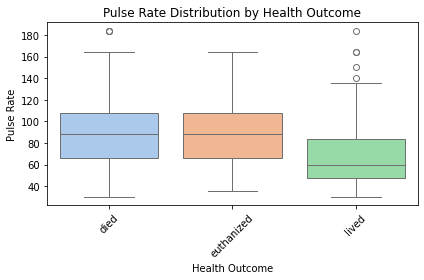

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'outcome' and calculate the mean pulse for each category
pulse_outcome_data = df.groupby('outcome')['pulse'].mean()

print(pulse_outcome_data)

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# Plotting using seaborn for a better box plot visual
sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

#### Q2

Context:
Understanding how rectal temperature correlates with health outcomes in horses can provide valuable insights for veterinary treatment strategies. Rectal temperature is a critical clinical parameter and its deviations from the norm can indicate various health conditions.

Task:
Analyze the impact of different rectal temperature categories on health outcomes. The rectal temperatures will be categorized into hypothermia, normal, and fever to observe how these conditions correlate with health outcomes.

Question:
After analyzing the bar chart which depicts the count of health outcomes within each rectal temperature category, identify the correct statement regarding the correlation between rectal temperature categories and health outcomes.

In [34]:
def categorize_temp(temp):
    # TODO: Return the category based on temperature values (use if-elif-else structure).
    if temp < 37.5:
        return 'hypothermia'
    elif temp >= 37.5 and temp<=38.5:
        return 'normal'
    else:
        return 'fever'
    


# Apply function to create a new column
df['temp_category'] = df['rectal_temp'].apply(categorize_temp)  # TODO: Choose the appropriate DataFrame method to apply a function.

# Grouping data by temperature category and outcome for plotting
grouped_data = df.groupby(['temp_category','outcome']).count().reset_index()  # TODO: Group by two columns and count a unique identifier.


In [35]:
grouped_data

,temp_category,outcome,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,cp_data
0,fever,died,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
1,fever,euthanized,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2,fever,lived,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
3,hypothermia,died,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
4,hypothermia,euthanized,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
5,hypothermia,lived,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
6,normal,died,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
7,normal,euthanized,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
8,normal,lived,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382


In [30]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,cp_data,outcome,temp_category
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,no,died,normal
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,no,euthanized,normal
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,no,lived,normal
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,yes,lived,hypothermia
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,yes,lived,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,no,lived,normal
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,yes,died,normal
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,yes,lived,normal
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,no,lived,normal


In [41]:
df.groupby(['temp_category', 'outcome']).size().reset_index(name='Count')

,temp_category,outcome,Count
0,Fever,died,115
1,Fever,euthanized,61
2,Fever,lived,139
3,Hypothermia,died,72
4,Hypothermia,euthanized,47
5,Hypothermia,lived,53
6,Normal,died,223
7,Normal,euthanized,143
8,Normal,lived,382


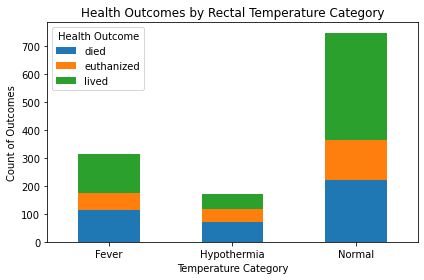

In [36]:
def categorize_temp(temp):
    if temp < 37.5:
        return 'Hypothermia'
    elif 37.5 <= temp <= 38.5:
        return 'Normal'
    else:
        return 'Fever'

# Apply function to create a new column
df['temp_category'] = df['rectal_temp'].apply(categorize_temp)

# Grouping data by temperature category and outcome for plotting
grouped_data = df.groupby(['temp_category', 'outcome']).size().reset_index(name='Count')

# Create a pivot table for easier plotting
pivot_table = grouped_data.pivot(index='temp_category', columns='outcome', values='Count').fillna(0)

# Plotting the data
pivot_table.plot(kind='bar', stacked=True)
plt.title('Health Outcomes by Rectal Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=0)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

In [43]:
pivot_table

outcome,died,euthanized,lived
temp_category,,,
Fever,115,61,139
Hypothermia,72,47,53
Normal,223,143,382


#### Q5
Context:
In statistical analysis for categorical data, the Chi-square test of independence is essential for determining the association between features. This test helps identify which features are statistically significant in relation to the outcome variable in a dataset.

Task:
Perform a Chi-square test of independence on each categorical feature against the 'outcome' variable to determine their significance in predicting health outcomes of horses. Given the significance level of 0.05, identify which feature is not significantly associated with the outcome.

Question:
Based on a significance level of 0.05, which feature was found to be not significantly associated with the 'outcome' variable, therefore failing the Chi-square test?

In [44]:
from scipy.stats import chi2_contingency  # TODO: Import the necessary function for performing the Chi-square test.

threshold = .05

print(f'{"Column":<25} | Test result')
print('----------------------------------------')

for column in cat_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df['outcome'])  # TODO: Create a contingency table from two categorical columns.

    # Perform the Chi-Square test
    chi2, p, dof, expected_freq = chi2_contingency(contingency_table)  # TODO: Apply the imported function to compute the Chi-square statistic and p-value.

    print(f'{column:<25} |   ', '\033[32mPassed' if p < threshold else '\033[31mFailed', '\033[0m')

Column                    | Test result
----------------------------------------
temp_of_extremities       |    Passed 
peripheral_pulse          |    Passed 
mucous_membrane           |    Passed 
capillary_refill_time     |    Passed 
pain                      |    Passed 
peristalsis               |    Passed 
abdominal_distention      |    Passed 
nasogastric_tube          |    Passed 
nasogastric_reflux        |    Passed 
abdomen                   |    Passed 
abdomo_appearance         |    Passed 
rectal_exam_feces         |    Passed 


#### Q6
Context:
In preparation for building a Gaussian Naive Bayes model to predict horse health outcomes, the initial step involves preprocessing the dataset. This includes dropping less relevant columns and applying appropriate transformations to the remaining data.

Task:
Prepare the data by dropping specified columns and applying transformations suitable for a Gaussian Naive Bayes model.

Question:
After preprocessing, which categorical feature ends up with the highest number of unique ordinal values?

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  # TODO: Import necessary preprocessing classes.
from sklearn.compose import ColumnTransformer

# Drop unnecessary columns
df_temp = df.drop(['id'], axis=1)

# Identify numerical and categorical columns
numerical_cols = df_temp.select_dtypes(include=[int, float]).columns.tolist()  # TODO: Specify data types to select numerical (int and float both) columns.
categorical_cols = df_temp.select_dtypes(include=[object]).columns.tolist()  # TODO: Specify the data type for categorical(object).

# Remove the target column from the feature lists
categorical_cols.remove('outcome')

# Prepare target and features
X = df_temp.drop('outcome', axis=1)
y = df_temp['outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # TODO: Use the appropriate function to split the data.

# Create transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # TODO: Choose the correct transformer for numerical data.
        ('cat', OrdinalEncoder(), categorical_cols)  # TODO: Choose the correct transformer for categorical data that handles unknown categories.
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)  # TODO: Fit and Apply the preprocessor to training data.
X_test = preprocessor.transform(X_test)  # TODO: Apply the preprocessor to test data.


print(f'{"Column":<25} | Number of unique values')
print('------'*10)
for i in categorical_cols:
    print(f'{i:<25} |   ', f'\033[32m{df[i].unique()}' , '\033[0m')


Column                    | Number of unique values
------------------------------------------------------------
surgery                   |    ['yes' 'no'] 
age                       |    ['adult' 'young'] 
temp_of_extremities       |    ['cool' 'cold' 'normal' 'warm'] 
peripheral_pulse          |    ['reduced' 'normal' 'absent' 'increased'] 
mucous_membrane           |    ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red'] 
capillary_refill_time     |    ['more_3_sec' 'less_3_sec' '3'] 
pain                      |    ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' 'slight'] 
peristalsis               |    ['absent' 'hypomotile' 'normal' 'hypermotile' 'distend_small'] 
abdominal_distention      |    ['slight' 'moderate' 'none' 'severe'] 
nasogastric_tube          |    ['slight' 'none' 'significant'] 
nasogastric_reflux        |    ['less_1_liter' 'more_1_liter' 'none' 'slight'] 
rectal_exam_feces         |    ['decreased' 'absent' 'nor

#### Q7

Context:
Evaluating the performance of the Bernoulli Naive Bayes classifier not only through traditional classification metrics but also by analyzing the types of errors made can offer deeper insights into the model's behavior. A confusion matrix is particularly useful for this purpose as it visualizes the performance of an algorithm by showing the actual versus predicted classifications.

Task:
Generate a confusion matrix for the Bernoulli Naive Bayes model and analyze which outcome categories are most frequently misclassified.

Question:
According to the confusion matrix generated from the Bernoulli Naive Bayes model, which category is most frequently incorrectly predicted as "Euthanized"?

Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Died       0.66      0.78      0.71        89
  Euthanized       0.55      0.67      0.60        42
       Lived       0.74      0.58      0.65       116

    accuracy                           0.66       247
   macro avg       0.65      0.67      0.65       247
weighted avg       0.68      0.66      0.66       247



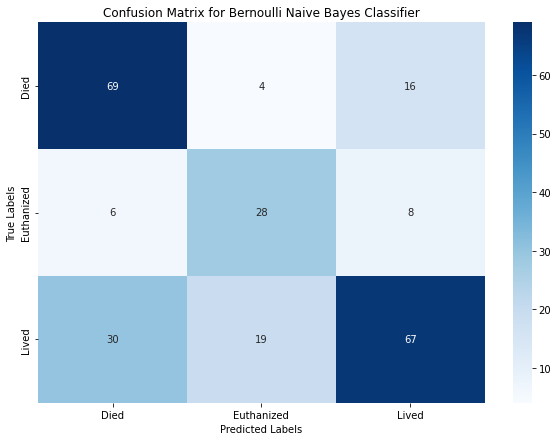

In [56]:
from sklearn.naive_bayes import BernoulliNB  # TODO: Correctly import the Bernoulli Naive Bayes classifier.
from sklearn.metrics import classification_report, confusion_matrix

# Encoding the 'outcome' variable
outcome_map = {'died': 0, 'euthanized': 1, 'lived': 2}
y_train_encoded = y_train.map(outcome_map)  # TODO: Apply the mapping to the 'y_train' series.
y_test_encoded = y_test.map(outcome_map)  # TODO: Apply the mapping to the 'y_test' series.

# Train Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train_encoded)  # TODO: Fit the Bernoulli Naive Bayes model using training data.
y_pred_ber = bernoulli_nb.predict(X_test)  # TODO: Predict outcomes using the test set.

print("Bernoulli Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, y_pred_ber, target_names=['Died', 'Euthanized', 'Lived']))  # TODO: Fill in the classification report with the appropriate arguments.

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_ber)  # TODO: Provide the correct variables to generate the confusion matrix.
categories = ['Died', 'Euthanized', 'Lived']

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()